# 1. モデルのインポート

In [1]:
from hawkes import Model

# 2. シミュレーション

### 2.1. 指数カーネル: 1次元

In [2]:
# 指数関数カーネルモデルのシミュレーターを生成
exp_simulator = Model.build_simulator('exp')

# シミュレーション時間を指定
T = 1000

# パラメータを指定
mu = 0.1
a = 0.2
b = 0.3

# シミュレーションを実行
exp_simulation = exp_simulator(mu=mu, a=a, b=b, T=T)

In [3]:
# シミュレーションの結果の情報一覧を表示
exp_simulation.info()

- kernel_type: exp
- params: {'mu': array([0.1]), 'a': array([[0.2]]), 'b': array([[0.3]])}
- end_time: 1000
- events:
  - dim_1: [  2.8   13.05  27.79  38.39  44.61  46.47  77.75  78.25  80.31  80.79
  83.57  85.31  85.38 103.96 106.19 117.2  118.05 119.33 120.91 121.77
 131.05 164.46 165.72 168.15 182.21 187.86 208.8  225.18 228.47 253.29
 259.11 264.32 269.04 271.03 302.48 309.21 314.25 319.22 320.88 326.89
 336.75 339.25 373.94 393.84 399.32 400.48 408.28 425.9  440.33 443.95
 485.09 495.88 496.87 500.74 511.94 517.07 517.98 520.14 526.84 528.1
 557.95 574.46 590.08 616.46 627.23 660.58 661.66 674.52 674.78 677.69
 679.46 684.4  685.08 685.21 688.38 697.47 701.31 701.75 703.43 707.58
 715.8  730.09 742.21 743.5  745.29 756.29 765.16 766.41 782.36 790.03
 792.27 804.76 807.25 814.67 816.52 849.68 852.18 854.36 855.25 860.52
 867.26 868.44 870.29 870.49 882.99 907.15 916.97 920.16 923.95 925.72
 931.56 944.45 951.23 962.22 974.16 974.28 983.93 992.26 995.2 ]


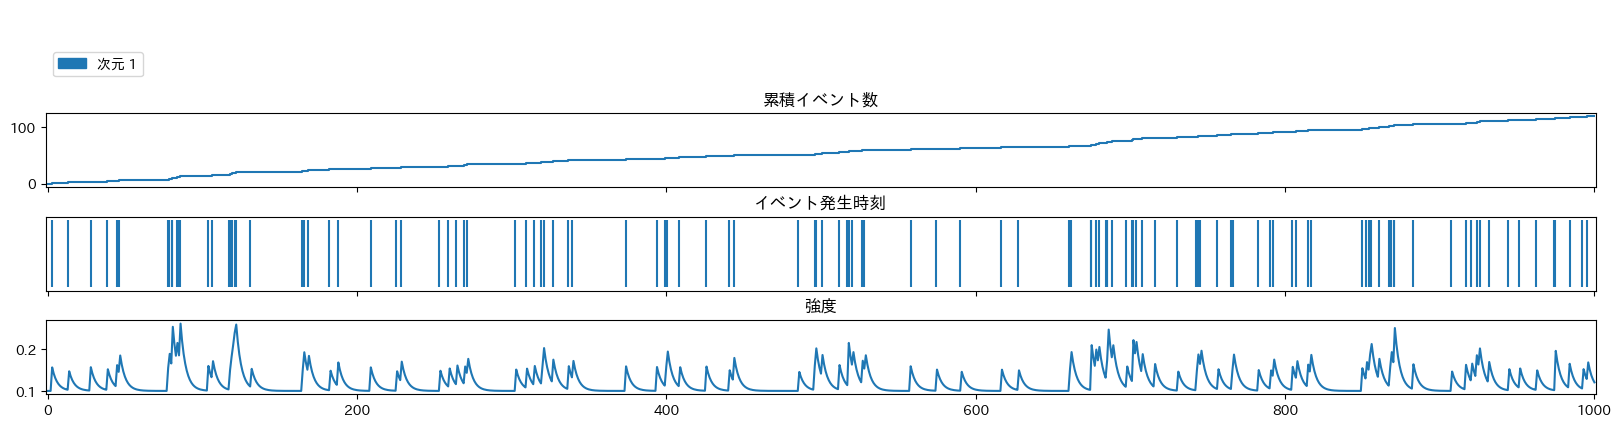

In [4]:
# シミュレーションの結果をプロット
exp_simulation.plot()

In [5]:
# シミュレーション結果の値の取得
print('✅ イベントの発生時刻:\n', exp_simulation.events)
print('✅ シミュレーション終了時刻:\n', exp_simulation.T)
print('✅ 条件付き強度関数:\n', exp_simulation.intensity)

✅ イベントの発生時刻:
 [  2.7988921   13.05255412  27.78564462  38.39163955  44.60752463
  46.46676801  77.74558141  78.252008    80.31464044  80.7921194
  83.56747628  85.30603891  85.37803625 103.96039264 106.18862079
 117.20415886 118.05320315 119.3251315  120.91435743 121.76556119
 131.05276291 164.45507823 165.72130457 168.14637145 182.20930151
 187.8600585  208.79516847 225.17764326 228.46571179 253.2883068
 259.11376179 264.32467966 269.04359385 271.03152551 302.48225657
 309.20730389 314.25442783 319.22032388 320.88009599 326.89447438
 336.75135894 339.24881277 373.94378483 393.8439205  399.31610728
 400.48351969 408.27880488 425.89643568 440.3259158  443.94923539
 485.08569343 495.88003918 496.86994209 500.74404299 511.94066398
 517.06944401 517.98324931 520.13885906 526.83560817 528.10307179
 557.95394469 574.45622478 590.0794666  616.46127954 627.22812216
 660.58116845 661.65860086 674.51864978 674.78393365 677.6856638
 679.46197768 684.40159289 685.07879666 685.20700892 688.37860391

### 2.2. 指数関数カーネル: 多次元

❗パラメータに関連する部分以外は1次元の場合と同様

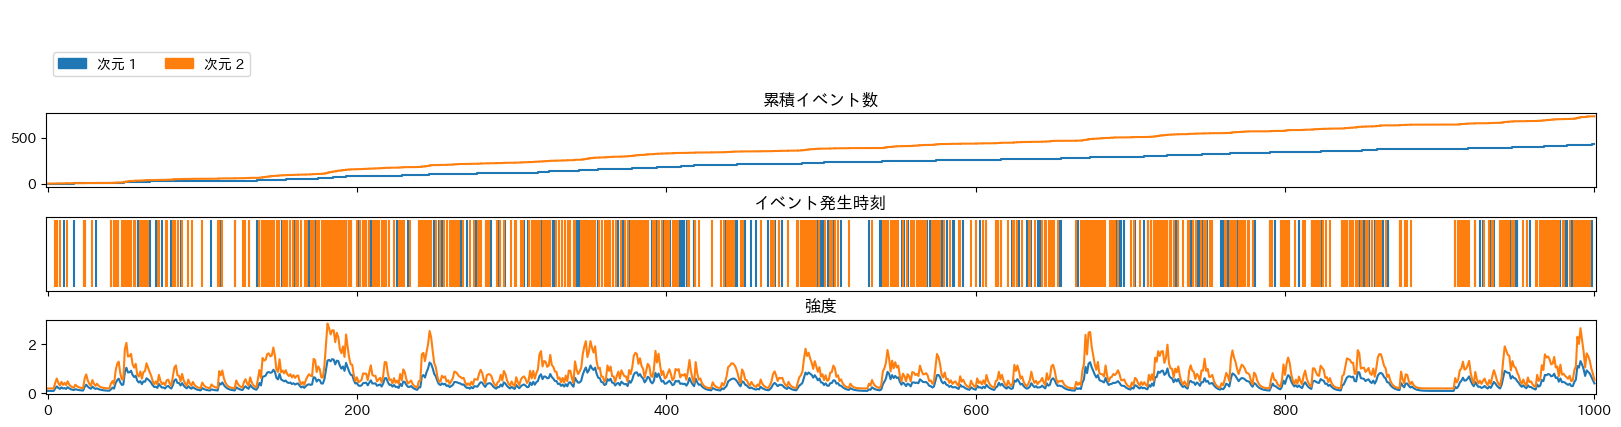

In [15]:
multi_exp_simulator = Model.build_simulator('exp')

T = 1000

# パラメータを指定 (mu: n次元ベクトル, a: n×n行列, b: n×n行列)
mu = [0.1, 0.2]
a = [[0.2, 0.3],
    [0.4, 0.5]]
b = [[0.3, 0.4],
    [0.5, 0.6]]

multi_exp_simulation = multi_exp_simulator(mu=mu, a=a, b=b, T=T)

multi_exp_simulation.plot()

### 2.3 べき分布カーネル: 1次元・多次元

In [14]:
# べき分布カーネルモデルのシミュレーターを生成
pow_law_simulator = Model.build_simulator('pow_law')

# シミュレーション時間を指定
T = 1000

# パラメータを指定: 1次元
mu = 0.1
K = 0.1
p = 2
c = 3

pow_law_simulation = pow_law_simulator(mu=mu, K=K, p=p, c=c, T=T)

# パラメータの指定: 多次元 (mu: n次元ベクトル, K: n×n行列, p: n×n行列, c: n×n行列)
mu = [0.1, 0.2]
K = [[0.1, 0.2],
     [0.3, 0.4]]
p = [[2, 3],
     [4, 5]]
c = [[3, 4],
     [5, 6]]

multi_pow_law_simulation = pow_law_simulator(mu=mu, K=K, p=p, c=c, T=T)


### 2.4 指数和カーネル: 1次元・多次元

❗工事中

# 3. 推定

### 3.1.　指数カーネル: 1次元

- kernel_type: exp
- params: {'mu': array([0.10989324]), 'a': array([[0.14811464]]), 'b': array([[1.01775492]])}
- end_time: 1000
- loglik: -387.5467401243632
- events:
  - dim_1: [  9.59  40.84  51.72  55.66  57.79  84.57  88.8   96.17  99.86 103.33
 134.62 135.07 137.32 138.   140.66 141.17 143.7  144.7  144.8  154.63
 159.09 170.18 175.62 177.59 197.17 225.54 226.28 233.51 245.96 266.57
 284.2  294.63 304.71 306.46 307.25 314.43 326.62 329.33 335.28 335.56
 354.53 372.5  387.91 391.42 401.85 407.07 407.37 409.1  410.79 414.82
 418.45 437.15 452.8  462.37 480.48 481.84 486.21 491.86 505.54 516.44
 516.83 517.31 526.42 526.55 527.45 532.13 538.34 538.52 538.71 574.05
 577.77 578.03 578.39 578.77 580.46 592.52 597.57 599.84 617.01 626.02
 629.76 631.84 640.01 641.7  653.34 669.08 676.97 680.94 718.   720.81
 730.93 734.18 736.49 737.73 740.27 768.26 769.05 770.82 817.36 819.64
 821.61 832.45 832.48 836.51 854.49 858.92 869.5  871.76 873.17 875.15
 883.78 895.55 896.46 896.81 903.64 919

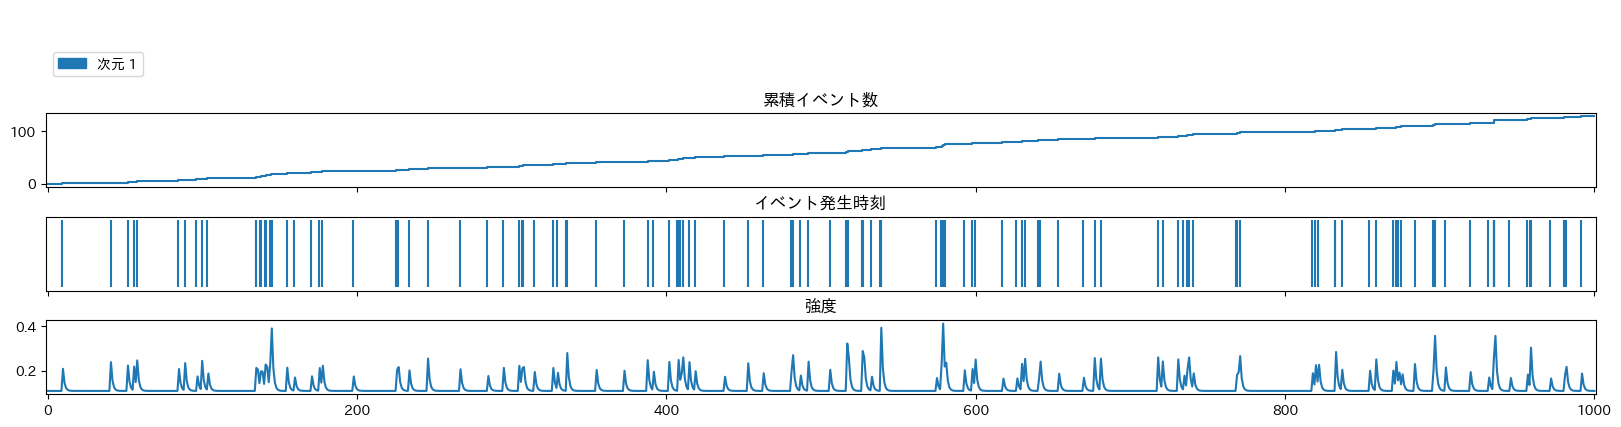

In [25]:
# -------テストデータ生成----------
exp_simulator = Model.build_simulator('exp')
mu, a, b, T = 0.1, 0.2, 0.3, 1000
simulation = exp_simulator(mu=mu, a=a, b=b, T=T)
test_data = simulation.events
# ------------------------------

# 推定器の生成
exp_estimator = Model.build_estimator('exp')

# 対数尤度の最小化の手法と設定値を指定-----------------------------👇
# 1. scipyのミニマイザーを使用する場合
scipy_method = 'scipy'
scipy_option = {
    'init_params': {'mu': 1, 'a': 1, 'b': 1}, # 探索開始する初期値
    'bounds': {'mu': (1e-5, None), 'a': (1e-5, None), 'b': (1e-5, None)}, # 探索するパラメータの範囲
}

# 2. 勾配法を使用する場合
gradient_method = 'gradient'
gradient_option = {
    'init_params': {'mu': 1, 'a': 1, 'b': 1}, # 探索開始する初期値
    'max_iter': 100000, # 最大イテレーション数
    'learning_rate': 0.0001, # 学習率
    'tol': 0.01, # 勾配のノルムがこの値以下になったら探索を終了する
}

# 3. グリッドサーチを使用する場合
grid_search_method = 'grid_search'
grid_search_option = {
    'grid': {'mu': slice(1e-5, 3, 0.1), 'a': slice(1e-5, 3, 0.1), 'b': slice(1e-5, 3, 0.1)}, # 探索するグリッド
}

# 4. ランダムサーチを使用する場合
random_search_method = 'random_search'
random_search_option = {
    'n_iter': 100000, # 探索する回数
    'bounds': {'mu': (1e-5, None), 'a': (1e-5, None), 'b': (1e-5, None)}, # 探索するパラメータの範囲
}

# ------------------------------------------------------------👆

# ミニマイザーの設定値をセット (本例はscipyのミニマイザーを使用)
exp_estimator.set_minimization_config(method=scipy_method, option=scipy_option)

# 推定
estimation_with_scipy = exp_estimator(events=test_data, T=T)

# 結果
estimation_with_scipy.info()
estimation_with_scipy.plot()

### 3.2. 指数カネール: 多次元

❗パラメータに関連する部分以外は1次元の場合と同様

- kernel_type: exp
- params: {'mu': array([0.08342012, 0.07851814]), 'a': array([[0.2549635 , 0.2948167 ],
       [0.27907536, 0.60857783]]), 'b': array([[0.37992058, 0.50223217],
       [0.49418636, 0.32492184]])}
- end_time: 1000
- loglik: -1165.6080804868934
- events:
  - dim_1: [  2.5   10.61  14.21  14.25  19.58  20.82  23.79  23.93  24.51  27.09
  31.48  37.38  46.46  48.82  49.79  49.84  51.97  55.79  57.03  58.05
  58.23  60.72  62.49  64.66  80.11  81.74  82.17  82.84  92.17  93.62
  94.47 124.44 124.77 129.6  129.69 152.12 153.3  153.89 155.91 156.97
 157.59 157.62 158.63 159.92 160.74 161.27 163.62 186.29 217.84 222.5
 225.5  226.72 266.43 268.48 269.23 275.39 280.18 281.58 285.34 287.18
 288.62 288.99 289.58 290.75 295.61 297.78 302.03 303.51 321.99 328.48
 329.63 331.22 333.83 337.04 342.78 383.29 388.1  388.19 396.99 402.41
 403.14 406.89 421.48 422.79 425.23 426.99 443.82 445.98 446.9  446.97
 448.11 462.63 468.96 476.82 497.1  501.26 501.99 502.08 502.7  506.16
 507.45 

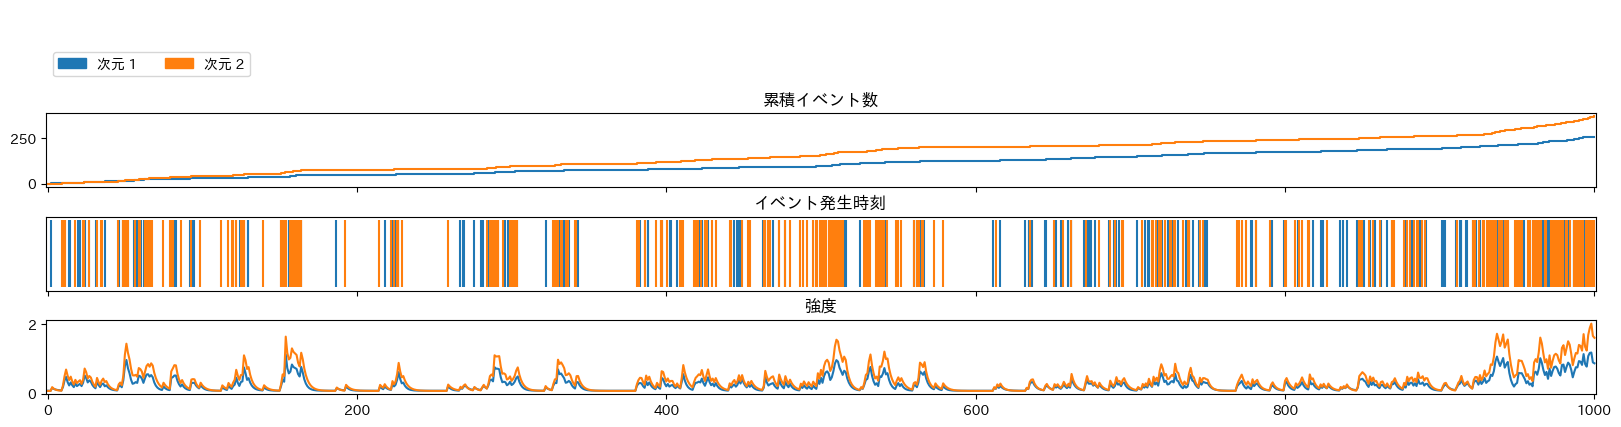

In [26]:
# -------テストデータ生成----------
exp_simulator = Model.build_simulator('exp')
mu, a, b, T = [0.1, 0.1], [[0.2, 0.3], [0.4, 0.5]], [[0.3, 0.4], [0.5, 0.6]], 1000
simulation = exp_simulator(mu=mu, a=a, b=b, T=T)
test_data = simulation.events
# ------------------------------

# 推定器の生成
multi_exp_estimator = Model.build_estimator('exp')

# 対数尤度の最小化の手法と設定値を指定-----------------------------👇
# 1. scipyのミニマイザーを使用する場合
scipy_method = 'scipy'
scipy_option = {
    'init_params': { # ❗探索開始する初期値
        'mu': [1, 1],
        'a': [[1, 1],
              [1, 1]],
        'b': [[1, 1],
              [1, 1]]
    },
    'bounds': { # ❗探索するパラメータの範囲
        'mu': [(1e-5, None), (1e-5, None)],
        'a': [[(1e-5, None), (1e-5, None)],
              [(1e-5, None), (1e-5, None)]],
        'b': [[(1e-5, None), (1e-5, None)],
              [(1e-5, None), (1e-5, None)]]
    },
}

# 2. 勾配法を使用する場合
gradient_method = 'gradient'
gradient_option = {
    'init_params': { # ❗探索開始する初期値
        'mu': [1, 1],
        'a': [[1, 1],
              [1, 1]],
        'b': [[1, 1],
              [1, 1]]
    },
    'max_iter': 100000, # 最大イテレーション数
    'learning_rate': 0.0001, # 学習率
    'tol': 0.01, # 勾配のノルムがこの値以下になったら探索を終了する
}

# 3. グリッドサーチを使用する場合
grid_search_method = 'grid_search'
grid_search_option = {
    'grid': { # ❗探索するグリッド
        'mu': [slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)],
        'a': [[slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)],
              [slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)]],
        'b': [[slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)],
              [slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)]],
    }
}

# 4. ランダムサーチを使用する場合
random_search_method = 'random_search'
random_search_option = {
    'n_iter': 100000, # 探索する回数
    'bounds': { # ❗探索するパラメータの範囲
        'mu': [(1e-5, None), (1e-5, None)],
        'a': [[(1e-5, None), (1e-5, None)],
              [(1e-5, None), (1e-5, None)]],
        'b': [[(1e-5, None), (1e-5, None)],
              [(1e-5, None), (1e-5, None)]]
    },
}
# ------------------------------------------------------------👆

# ミニマイザーの設定値をセット (本例はscipyのミニマイザーを使用)
multi_exp_estimator.set_minimization_config(method=scipy_method, option=scipy_option)

# 推定
multi_estimation_with_scipy = multi_exp_estimator(events=test_data, T=T)

# 結果
multi_estimation_with_scipy.info()
multi_estimation_with_scipy.plot()

### 3.3. べき分布カネール: 1次元・多次元

❗推定器の生成とパラメータに関連する部分(init_params, bounds, grid)以外は指数カーネルの場合(3.1, 3.2)と同様

##### 推定器の生成

In [28]:
pow_law_estimator = Model.build_estimator('pow_law')

##### ミニマイザーの設定値 （パラメーターに関連する部分）

In [30]:
# 1次元

# init_params: 探索開始する初期値
{'mu': 1, 'K': 1, 'p': 2, 'c': 2}
# bounds: 探索するパラメータの範囲
{'mu': (1e-5, None), 'K': (1e-5, None), 'p': (1+1e-5, None), 'c': (1+1e-5, None)}
# grid: 探索するグリッド
{'mu': slice(1e-5, 3, 0.1), 'K': slice(1e-5, 3, 0.1), 'p': slice(1+1e-5, 4, 0.1), 'c': slice(1+1e-5, 4, 0.1)}


# 多次元

# init_params: 探索開始する初期値
{
    'mu': [1, 1],
    'K': [[1, 1],
          [1, 1]],
    'p': [[2, 2],
          [2, 2]],
    'c': [[2, 2],
          [2, 2]]
}
# bounds: 探索するパラメータの範囲
{
    'mu': [(1e-5, None), (1e-5, None)],
    'K': [[(1e-5, None), (1e-5, None)],
          [(1e-5, None), (1e-5, None)]],
    'p': [[(1+1e-5, None), (1+1e-5, None)],
          [(1+1e-5, None), (1+1e-5, None)]],
    'c': [[(1+1e-5, None), (1+1e-5, None)],
          [(1+1e-5, None), (1+1e-5, None)]]
}
# grid: 探索するグリッド
{
    'mu': [slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)],
    'K': [[slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)],
          [slice(1e-5, 3, 0.1), slice(1e-5, 3, 0.1)]],
    'p': [[slice(1+1e-5, 4, 0.1), slice(1+1e-5, 4, 0.1)],
          [slice(1+1e-5, 4, 0.1), slice(1+1e-5, 4, 0.1)]],
    'c': [[slice(1+1e-5, 4, 0.1), slice(1+1e-5, 4, 0.1)],
          [slice(1+1e-5, 4, 0.1), slice(1+1e-5, 4, 0.1)]]
}

{'mu': [slice(1e-05, 3, 0.1), slice(1e-05, 3, 0.1)],
 'K': [[slice(1e-05, 3, 0.1), slice(1e-05, 3, 0.1)],
  [slice(1e-05, 3, 0.1), slice(1e-05, 3, 0.1)]],
 'p': [[slice(1.00001, 4, 0.1), slice(1.00001, 4, 0.1)],
  [slice(1.00001, 4, 0.1), slice(1.00001, 4, 0.1)]],
 'c': [[slice(1.00001, 4, 0.1), slice(1.00001, 4, 0.1)],
  [slice(1.00001, 4, 0.1), slice(1.00001, 4, 0.1)]]}

### 3.4. 指数和カーネル: １次元・多次元

❗工事中